
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - polynomial regression <br>
<font color=696880 size=4>
Ali Rahimi Akbar

____

#Personal Data

In [ ]:
# Set your student number and name
student_number = 99105429
Name = Amirhossein
Last_Name = Khoshbakht

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.


## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-3 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [27]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X = np.linspace(range_start, range_end, num_samples)

    y = 0.1 * X**6 - 2 * X**3 + 7 * X**2 - 9 * X + 3

    noise = np.random.normal(0, noise_std, num_samples)
    y_noisy = y + noise

    return X, y_noisy

range_start, range_end, num_samples = -3, -1, 1000
X, y_noisy = generate_dataset(range_start, range_end, num_samples)

print("X:", X[:5])
print("y_noisy:", y_noisy[:5])


X: [-3.         -2.997998   -2.995996   -2.99399399 -2.99199199]
y_noisy: [217.47603102 220.37835658 214.58220035 223.76156099 228.2946034 ]


## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 4 to 6.**

In [28]:
from sklearn.model_selection import train_test_split

range_start, range_end, num_samples = -3, -1, 1000
X, y_noisy = generate_dataset(range_start, range_end, num_samples)

X_train, X_test_1, y_train, y_test_1 = train_test_split(X, y_noisy, test_size=0.5, random_state=42)

range_start_2, range_end_2, num_samples_2 = 4, 6, 500
X_test_2, y_test_2 = generate_dataset(range_start_2, range_end_2, num_samples_2)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set 1 shape:", X_test_1.shape, y_test_1.shape)
print("Test set 2 shape:", X_test_2.shape, y_test_2.shape)


Training set shape: (500,) (500,)
Test set 1 shape: (500,) (500,)
Test set 2 shape: (500,) (500,)


## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 12. You can't use sklearn library for this section

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

class PolynomialRegression:

    def __init__(self, degree, learning_rate=0.05, iterations=500):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.scaler = StandardScaler()

    def fit(self, X, Y):
        X_poly = self._polynomial_features(X, self.degree)
        X_poly = self.scaler.fit_transform(X_poly)  # Normalizing the features
        self.theta = np.zeros(X_poly.shape[1])
        m = len(Y)

        for _ in range(self.iterations):
            predictions = X_poly.dot(self.theta)
            errors = predictions - Y
            gradient = X_poly.T.dot(errors) / m
            self.theta -= self.learning_rate * gradient

        return self

    def predict(self, X):
        X_poly = self._polynomial_features(X, self.degree)
        X_poly = self.scaler.fit_transform(X_poly)
        return X_poly.dot(self.theta)

    def _polynomial_features(self, X, degree):
        X_poly = np.ones((X.shape[0], degree + 1))
        for i in range(1, degree + 1):
            X_poly[:, i] = X ** i
        return X_poly

range_start, range_end, num_samples = -3, -1, 1000
X, y_noisy = generate_dataset(range_start, range_end, num_samples)

X_train, X_test_1, y_train, y_test_1 = train_test_split(X, y_noisy, test_size=0.5, random_state=42)

range_start_2, range_end_2, num_samples_2 = 4, 6, 500
X_test_2, y_test_2 = generate_dataset(range_start_2, range_end_2, num_samples_2)

degrees = range(2, 13)
models = {}

for degree in degrees:
    model = PolynomialRegression(degree)
    model.fit(X_train, y_train)
    models[degree] = model
    print(f"Model of degree {degree} trained.")

for degree, model in models.items():
    y_pred_1 = model.predict(X_test_1)
    y_pred_2 = model.predict(X_test_2)
    print(f"Degree {degree}: Test Set 1 Predictions: {y_pred_1[:5]}, Test Set 2 Predictions: {y_pred_2[:5]}")


Model of degree 2 trained.
Model of degree 3 trained.
Model of degree 4 trained.
Model of degree 5 trained.
Model of degree 6 trained.
Model of degree 7 trained.
Model of degree 8 trained.
Model of degree 9 trained.
Model of degree 10 trained.
Model of degree 11 trained.
Model of degree 12 trained.
Degree 2: Test Set 1 Predictions: [-12.58825678 -48.34274875 -48.79189713 -36.36979516   8.20949001], Test Set 2 Predictions: [-47.56160739 -47.40944025 -47.25704142 -47.1044109  -46.9515487 ]
Degree 3: Test Set 1 Predictions: [-18.08439843 -48.9904513  -49.3386076  -39.32554546   2.51429452], Test Set 2 Predictions: [24.06189827 24.00480702 23.9475162  23.89002552 23.83233467]
Degree 4: Test Set 1 Predictions: [-20.82552562 -48.47382977 -48.76881153 -40.13261953  -0.94546849], Test Set 2 Predictions: [-19.35295046 -19.30856095 -19.26402031 -19.21932821 -19.1744843 ]
Degree 5: Test Set 1 Predictions: [-21.38142325 -47.80674396 -48.09036649 -39.82583889  -2.1385137 ], Test Set 2 Predictions: 

## 4. Model Evaluation (15 Points)
Evaluate the models on both train and test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.

In [30]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_train, y_train, X_test_1, y_test_1, X_test_2, y_test_2):
    results = []
    for degree, model in models.items():
        y_train_pred = model.predict(X_train)
        y_test_1_pred = model.predict(X_test_1)
        y_test_2_pred = model.predict(X_test_2)

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test_1 = mean_squared_error(y_test_1, y_test_1_pred)
        mse_test_2 = mean_squared_error(y_test_2, y_test_2_pred)

        results.append({
            "degree": degree,
            "mse_train": mse_train,
            "mse_test_1": mse_test_1,
            "mse_test_2": mse_test_2
        })

    return results

range_start, range_end, num_samples = -3, -1, 1000
X, y_noisy = generate_dataset(range_start, range_end, num_samples)

X_train, X_test_1, y_train, y_test_1 = train_test_split(X, y_noisy, test_size=0.5, random_state=42)

range_start_2, range_end_2, num_samples_2 = 4, 6, 500
X_test_2, y_test_2 = generate_dataset(range_start_2, range_end_2, num_samples_2)

degrees = range(2, 13)
models = {}

for degree in degrees:
    model = PolynomialRegression(degree)
    model.fit(X_train, y_train)
    models[degree] = model
    print(f"Model of degree {degree} trained.")

results = evaluate_models(models, X_train, y_train, X_test_1, y_test_1, X_test_2, y_test_2)

for result in results:
    print(f"Degree {result['degree']}: MSE Train: {result['mse_train']}, MSE Test Set 1: {result['mse_test_1']}, MSE Test Set 2: {result['mse_test_2']}")


Model of degree 2 trained.
Model of degree 3 trained.
Model of degree 4 trained.
Model of degree 5 trained.
Model of degree 6 trained.
Model of degree 7 trained.
Model of degree 8 trained.
Model of degree 9 trained.
Model of degree 10 trained.
Model of degree 11 trained.
Model of degree 12 trained.
Degree 2: MSE Train: 7258.073318827669, MSE Test Set 1: 8121.542760380089, MSE Test Set 2: 4360973.317674338
Degree 3: MSE Train: 7187.590610009741, MSE Test Set 1: 8044.96226687754, MSE Test Set 2: 4471413.306011271
Degree 4: MSE Train: 7170.507963702994, MSE Test Set 1: 8026.41071231729, MSE Test Set 2: 4397182.096922041
Degree 5: MSE Train: 7168.537762336952, MSE Test Set 1: 8023.857299014485, MSE Test Set 2: 4455340.798205096
Degree 6: MSE Train: 7168.473393851608, MSE Test Set 1: 8023.412524157472, MSE Test Set 2: 4429673.737993304
Degree 7: MSE Train: 7168.648073668416, MSE Test Set 1: 8023.386064614859, MSE Test Set 2: 4447890.06180677
Degree 8: MSE Train: 7168.799064464002, MSE Test 

## 5. Plotting your predicted polynomial function

plot your predicted function at degree 5 and 6 and 7 and the base function from question in range -3 to -1.

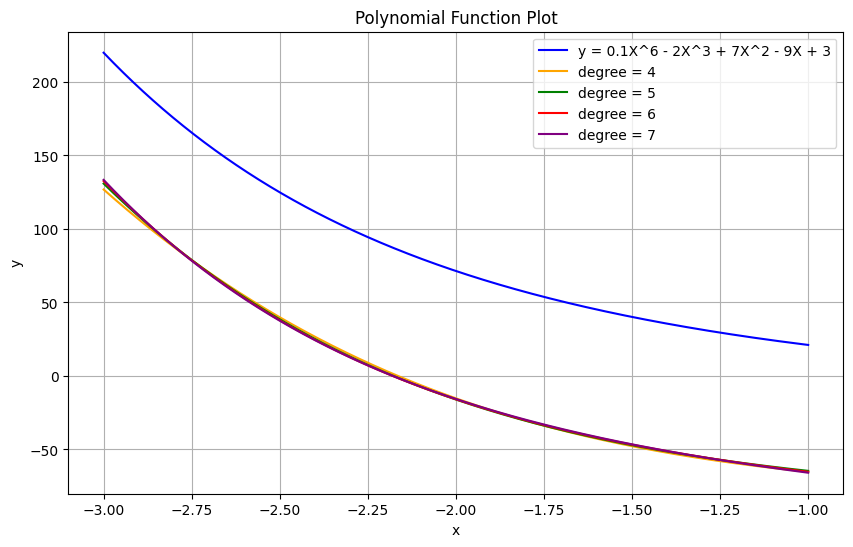

In [32]:

degrees = [4 ,5 ,6, 7]

plt.figure(figsize=(10, 6))
plt.plot(X_plot, y_base, label="y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3", color="blue")

colors = ['orange', 'green', 'red', 'purple']
for i, degree in enumerate(degrees):
    model = models[degree]
    y_pred = model.predict(X_plot)
    plt.plot(X_plot, y_pred, label=f"degree = {degree}", color=colors[i])

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Function Plot")
plt.grid(True)
plt.show()


## 6. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and test sets based on the model degree varying from 2 to 12.

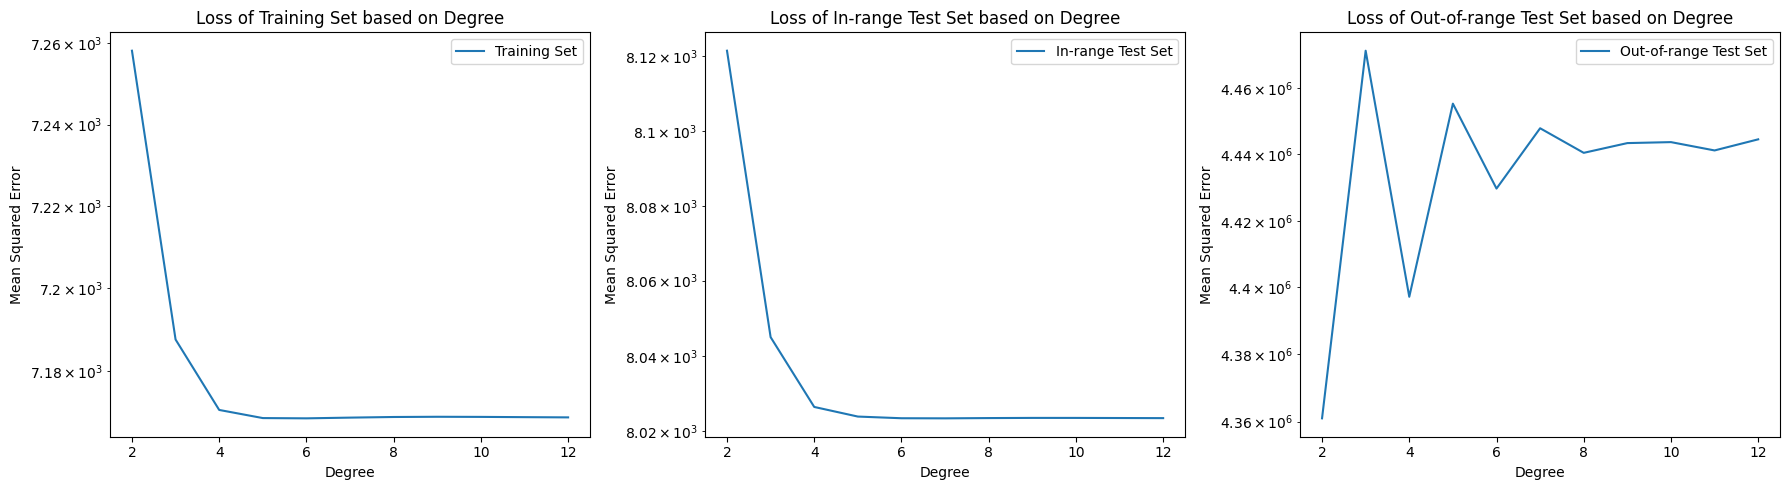

In [33]:
degrees = [result['degree'] for result in results]
mse_train = [result['mse_train'] for result in results]
mse_test_1 = [result['mse_test_1'] for result in results]
mse_test_2 = [result['mse_test_2'] for result in results]

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(degrees, mse_train, label='Training Set')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
plt.title('Loss of Training Set based on Degree')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(degrees, mse_test_1, label='In-range Test Set')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
plt.title('Loss of In-range Test Set based on Degree')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(degrees, mse_test_2, label='Out-of-range Test Set')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
plt.title('Loss of Out-of-range Test Set based on Degree')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion (10 Points)
With comparing the loss of **training set and the test set** specially in higher degrees, what we can conclude about the bias - variance trade off?